4304
4304
4304


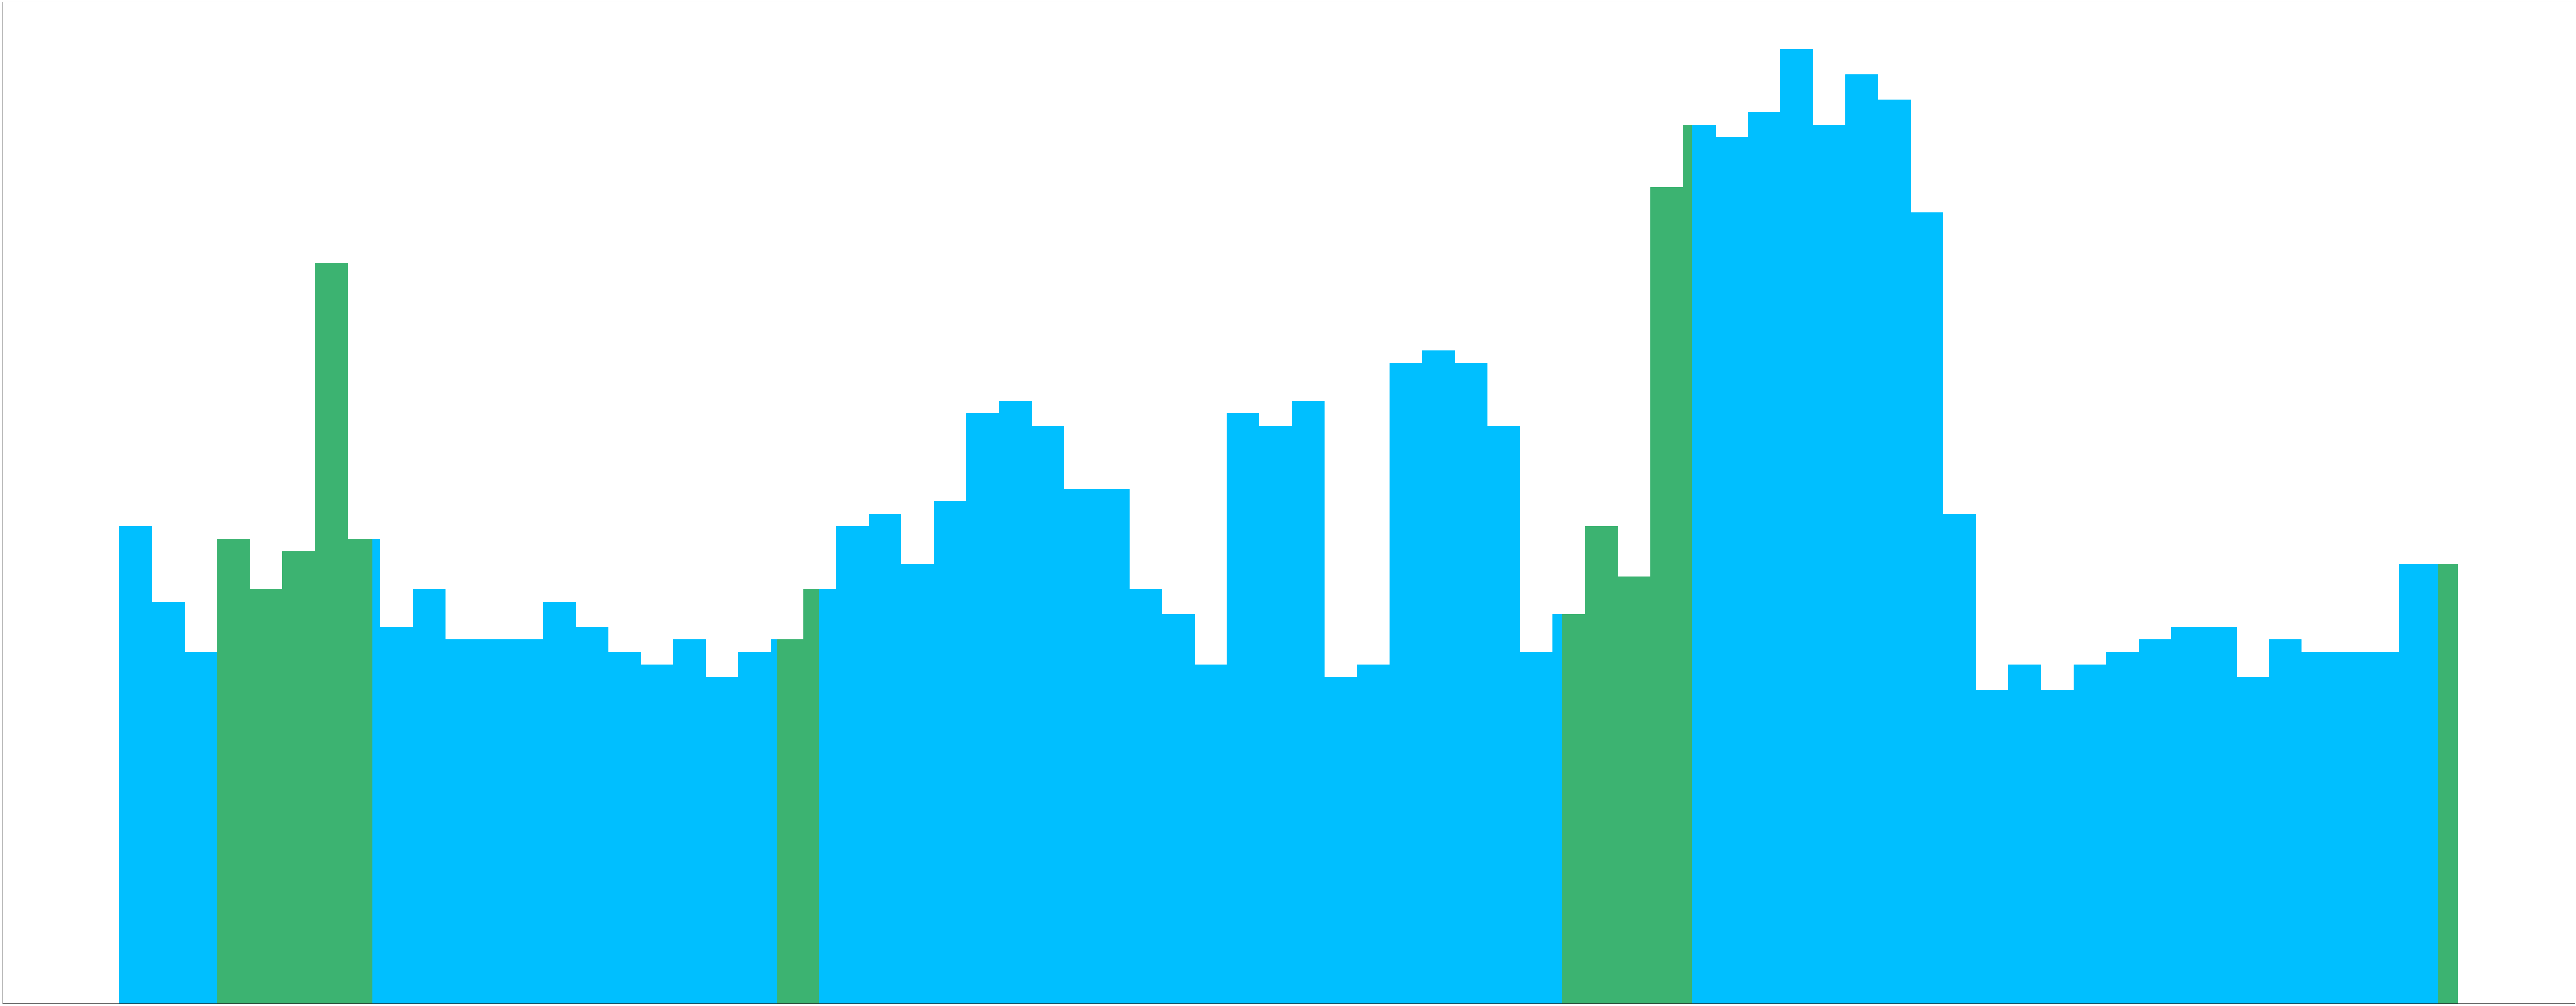

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

with open('./评分GT.txt') as gt:
    content = gt.readlines()
    gt_score = content[43].strip('\n').split(', ')
    # print(gt_score)
    print(len(gt_score))
gt.close()

num = 10000
data = np.zeros([len(gt_score)])
for j in range(len(gt_score)):
    # if j < num:
    data[j] = float(gt_score[j])
    

with open('./评分dsn.txt') as dsn:
    content = dsn.readlines()
    dsn_score = content[43].strip('\n').split(', ')
    # print(dsn_score)
    print(len(dsn_score))
dsn.close()


color_test = []
for i in range(len(dsn_score)):
    # if i < num:
    if int(dsn_score[i]) == 0:
        color_test.append('#00BFFF')
    else:
        # our 
        # color_test.append('#B22222')
        # dsn
        color_test.append('#3CB371')
        # vas
        # color_test.append('#F0E68C')
        # human
        # color_test.append('#FFA500')
print(len(color_test))

     
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(200, 80))

#去除坐标轴
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])

#去除网格
ax.grid(False)

#设置坐标轴里面的颜色
ax.patch.set_facecolor("white")            #设置ax1区域背景颜色               
ax.patch.set_alpha(0)                      #设置ax1区域背景颜色透明度  

ax.bar(range(len(data)), data, color=color_test, edgecolor=color_test, width = 1.0)

plt.savefig('./5/aaa.png')
plt.show()

In [17]:
import skimage.io as io
img_io = io.imread('1.jpg')#读取数据
print("img_io :",img_io .shape)

img_io : (400, 604, 3)


In [18]:
img_io[:,:,0] = 0
img_io[:,:,2] = 0

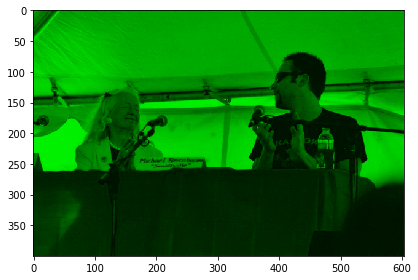

In [19]:
io.imshow(img_io)
io.imsave('green.jpg',img_io)

9671
9671
9671
9671
9671
9671
Bbox(x0=1.0562499999999995, y0=-0.04419999999999996, x1=9.193750000000001, y1=1.7526999999999997)
Bbox(x0=1.2, y0=-0.01, x1=8.8, y1=1.75)


/var/folders/ph/_gcsp46s7gnff3b2sgpnhwsr0000gn/T/ipykernel_72824/3374407700.py:81: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.set_yticks([])


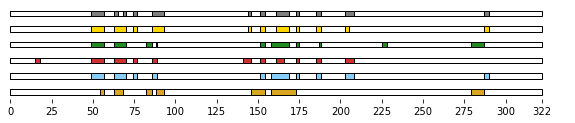

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.transforms import Bbox

filename = ['./评分gtsummary_tvsum_vsum.txt','./评分Our.txt', './无监督评分Our.txt', './评分VAS.txt','./评分dsn.txt','./DR_DSN_video_6.txt']
label = ['1', '2', '3', '4', '5', '6']
# color = ['blue', 'yellow', 'green', 'red']
color = ['#DAA520', '#87CEFA', '#CD3333', '#228B22', '#FFD700', '#808080']

fig = plt.figure(figsize=(10, 1.7))
ax = fig.add_subplot(111)    

for index in range(6):
    
    with open(filename[index]) as dsn:
        content = dsn.readlines()
        if index == 5:
            dsn_score = content[0].strip('\n').split(', ')
        else:
            dsn_score = content[5].strip('\n').split(', ')
        print(len(dsn_score))
    dsn.close()

    # judge whether draw the first 
    whether_first_frame_predicted = False

    # this length and accumulate length
    accumulate_length = []
    last_change_frame = 0

    last_frame_value = 10000
    for i in range(len(dsn_score)):

        # judge whether the first frame is predicted as true
        if i == 0:

            if int(dsn_score[0]) == 0:
                pass
            else:
                whether_first_frame_predicted = True

            last_frame_value = int(dsn_score[0])

        elif i == len(dsn_score) - 1:
            # length.append(i-last_change_frame)
            accumulate_length.append(last_change_frame)
        # else, add to the frame
        else:
            # if this frame is different from last value
            if int(dsn_score[i]) != last_frame_value:
                accumulate_length.append(last_change_frame)
                last_change_frame = i
                last_frame_value = int(dsn_score[i])
            else:
                pass

    if whether_first_frame_predicted == False:
        draw_white = True
    else:
        draw_white = False

    for i in range(len(accumulate_length)):

        # width
        if i == len(accumulate_length)-1:
            temp_width = int(len(dsn_score)/30)- int(accumulate_length[i]/30)
        else:
            temp_width = int(accumulate_length[i+1]/30)- int(accumulate_length[i]/30)

        if draw_white == True:
            ax.barh(y=label[index], width=temp_width, height=0.35, left=int(accumulate_length[i]/30), edgecolor='black', color='white')
        else:
            ax.barh(y=label[index], width=temp_width, height=0.35, left=int(accumulate_length[i]/30), edgecolor='black', color=color[index])
        draw_white = (not draw_white)

x_list = np.arange(0, int(len(dsn_score)/30), 25).tolist() + [int(len(dsn_score)/30)]
ax.set_xticks(x_list)
# ax.set_xticklabels(x_list)
# ax.set_yticks(['1','2','3','4'])
ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)


extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
print(extent.expanded(1.05, 1.4))
my_blit_box = Bbox( np.array([[1.2, -0.01],[8.8, 1.75]]) )
print(my_blit_box)

fig.savefig('video_6.png', bbox_inches=my_blit_box, dpi=200)
plt.show()

# video 4:
# 0.6721018446627405; 0.567834688892984; 0.6005410726165612; 0.6378999411530748

# video 6:
# 0.6765312158933768; 0.6073949084941613; 0.6271390482352165; 0.640239688814651

In [ ]:
# ax.set_title('图1 垂直柱状图')

# bar1 = ax.barh(y=1, width=20, height=0.4, edgecolor='black', color='white')
# bar2 = ax.barh(y=1, width=25, height=0.4, left=20, edgecolor='black', color='blue')
# # 通过bottom参数设置起始位置, 起始位置就是下半部分（bar1）条形的高度
# ax.set_xlabel('组别')
# ax.set_ylabel('分数')
# ax.set_title('各组不同性别分数')
# ax.set_xticks(range(5))
# ax.set_xticklabels(label)
# ax.set_yticklabels(np.arange(0, 81, 10))
#ax.legend((bar1, bar2))